# Multiple Domain Testing

## Mash Tests

In [2]:
import test_manifold_algorithms as tma
from MASH_MD import MASH
import matplotlib.pyplot as plt
import numpy as np

2024-09-23 09:32:56.525628: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 09:32:56.526333: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 09:32:56.529727: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 09:32:56.575739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 09:32:58.197197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

### Toy Data

In [2]:
d1 = np.random.randint(10, size = (3, 4))
d2 = np.random.randint(10, size = (3, 2))
d3 = np.random.randint(10, size = (3, 4))
d3

array([[5, 4, 1, 1],
       [5, 8, 4, 7],
       [4, 0, 6, 5]])

Time Data Below
 Time it took to execute the graph for domain 0:  0.03669
 Time it took to compute kernal 0:  2e-05
 Time it took to execute SGDM for domain 1:  0.00024
 Time it took to execute the graph for domain 1:  0.02395
 Time it took to execute the graph for domain 2:  0.09527
 Time it took to compute kernal 2:  2e-05
Length of weights to add: 3
Length of edges to add: 0
Length of edges to add: 0
Length of edges to add: 1
Length of edges to add: 2
Length of weights to add: 3
Length of edges to add: 2
Length of edges to add: 1
Length of edges to add: 0
Length of edges to add: 0


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(


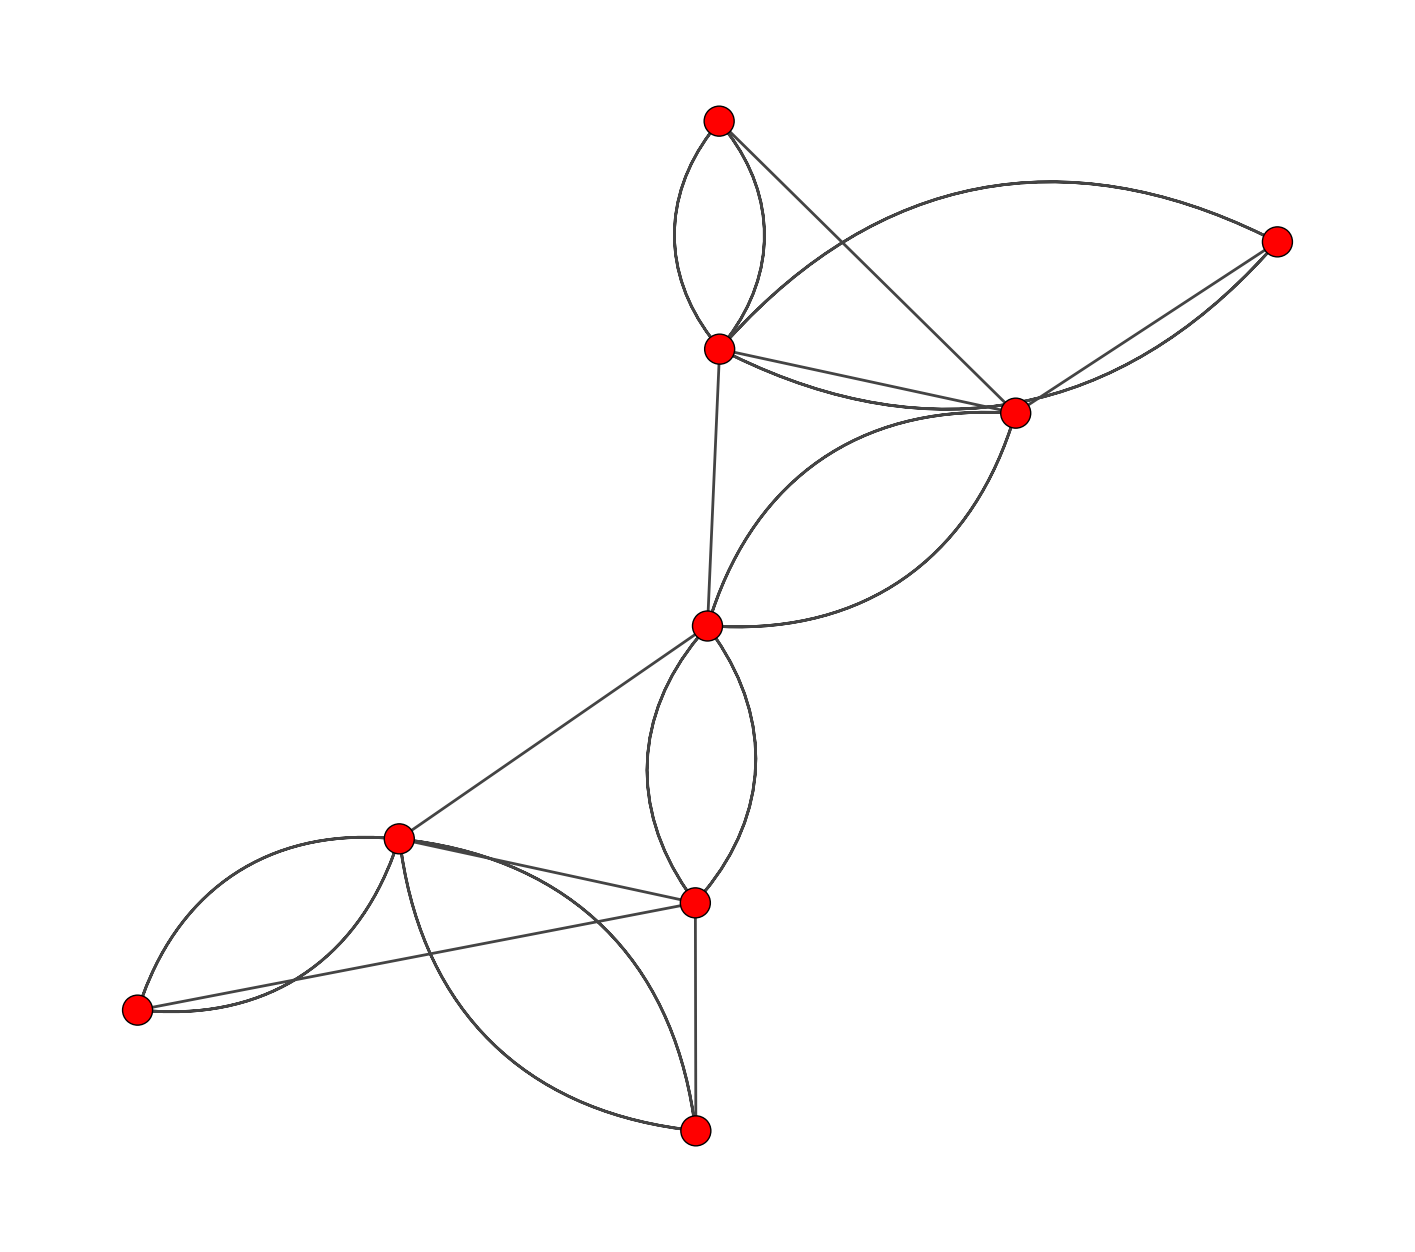

 Time it took to compute merge_graphs function:  0.26857
 Time it took to compute similarity_matrix function:  3e-05
Using optimal t value of 25
 Time it took to compute diffusion process:  0.00389
Fit process finished. We recommend calling optimize_by_creating_connections.


In [3]:
test = MASH(t = -1, knn = 2, distance_measures= ["default", "euclidean", "default"], verbose = 7)
test.fit([d1, d2, d3], np.array([[np.nan, 0, 0],
                                 [2, 2, np.nan]]))

In [8]:
dc0a = tma.test_manifold_algorithms("waveform.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=42)
dc0b = tma.test_manifold_algorithms("waveform.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=10)


 
 
---------------------------       Initalizing class with waveform.csv data       ---------------------------

MDS initialized with 40 components
The knn values are: (2, 103, 204, 305, 406, 507, 608, 709, 810, 911)

 
 
---------------------------       Initalizing class with waveform.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (5000, 40)
Split B Features shape (5000, 40)
MDS initialized with 40 components
The knn values are: (2, 103, 204, 305, 406, 507, 608, 709, 810, 911)


In [9]:
md = MASH(t = -1, knn = 5, distance_measures= ["default", "euclidean", "default"], verbose = 3)
md.fit([dc0a.split_A, dc0a.split_B, dc0b.split_A], np.array([[2,2,2], [150,150,150], [23,23,23], [43,43,43], [200,200,200]]))

/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (5000, 5000) is expensive. Consider setting n_pca.
  warnings.warn(


Using optimal t value of 15


Scores from domain 1 to 2: 
    Cross Embedding: 0.564453125
    FOSCTTM: 0.19618733723958334
Scores from domain 1 to 3: 
    Cross Embedding: 0.6419270833333333
    FOSCTTM: 0.1735161675347222
Scores from domain 2 to 3: 
    Cross Embedding: 0.5657552083333334
    FOSCTTM: 0.2517801920572917


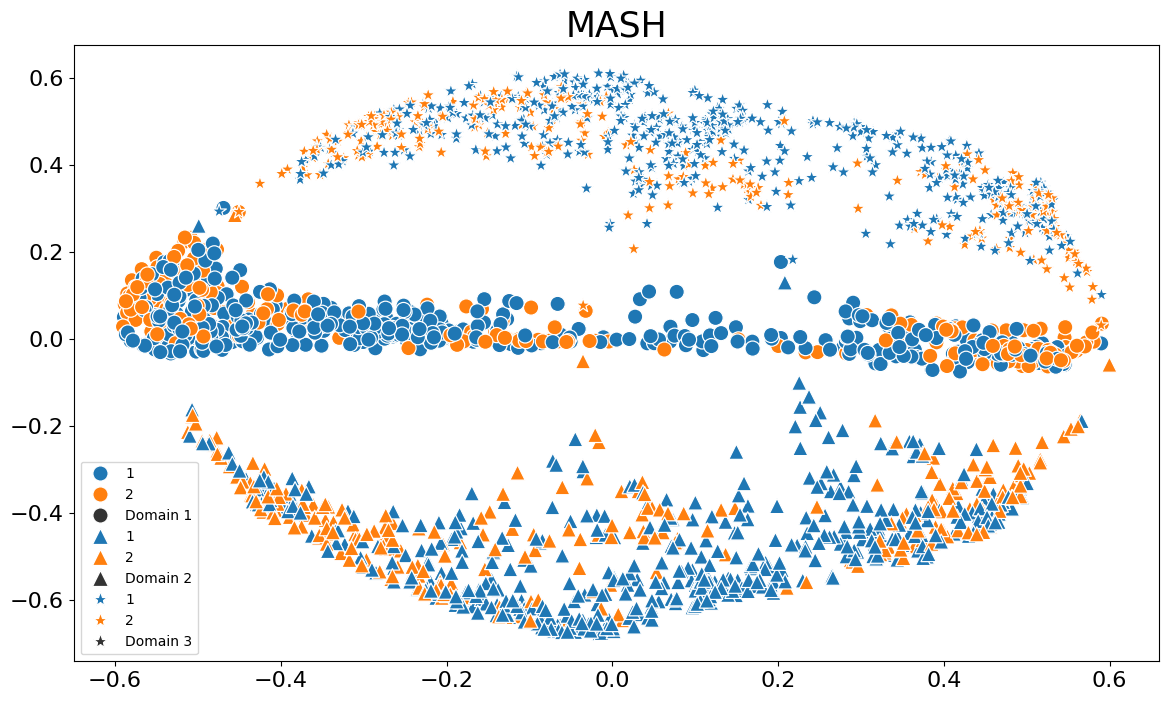

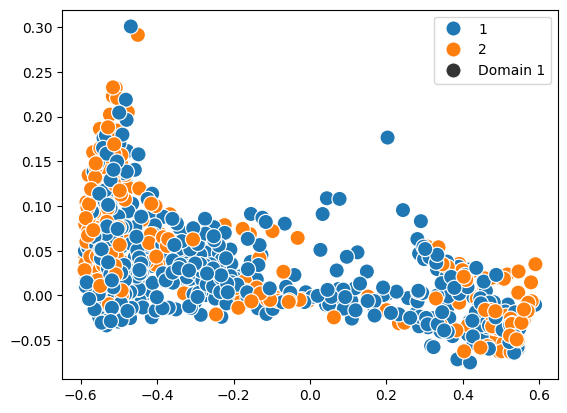

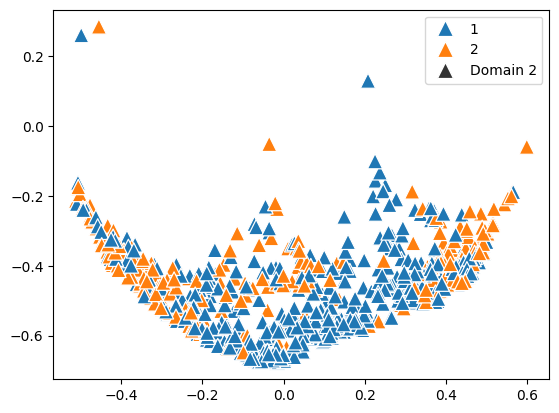

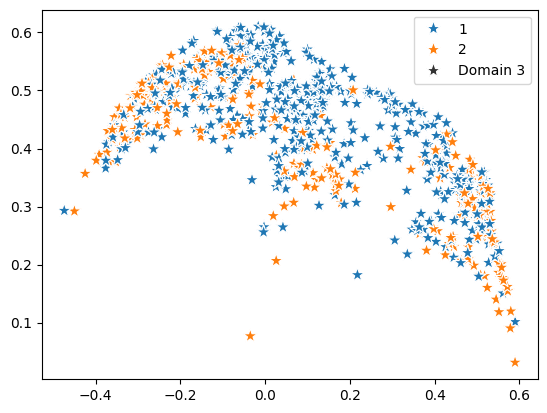

In [7]:
md.plot_emb([dc0a.labels, dc0b.labels, dc0a.labels])
md.plot_all_embeddings([dc0a.labels, dc0b.labels, dc0a.labels])

### Actual data


In [13]:
dc0a = tma.test_manifold_algorithms("diabetes.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=42)
dc0b = tma.test_manifold_algorithms("diabetes.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=10)


 
 
---------------------------       Initalizing class with diabetes.csv data       ---------------------------

MDS initialized with 8 components
The knn values are: (2, 18, 34, 50, 66, 82, 98, 114, 130, 146)

 
 
---------------------------       Initalizing class with diabetes.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (768, 8)
Split B Features shape (768, 8)
MDS initialized with 8 components
The knn values are: (2, 18, 34, 50, 66, 82, 98, 114, 130, 146)


In [14]:
md = MASH(t = -1, knn = 5, distance_measures= ["default", "euclidean", "default"], verbose = 7)

In [15]:
#Testing fit portions
md.domains = [dc0a.split_A, dc0b.split_B, dc0a.split_B]
md.domain_count = len(md.domains)
md.build_graphs()

 Time it took to execute the graph for domain 0:  0.09053
 Time it took to compute kernal 0:  0.0008
 Time it took to execute SGDM for domain 1:  0.00504
 Time it took to execute the graph for domain 1:  0.14416


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (768, 768) is expensive. Consider setting n_pca.
  warnings.warn(


 Time it took to execute the graph for domain 2:  0.08635
 Time it took to compute kernal 2:  0.00118


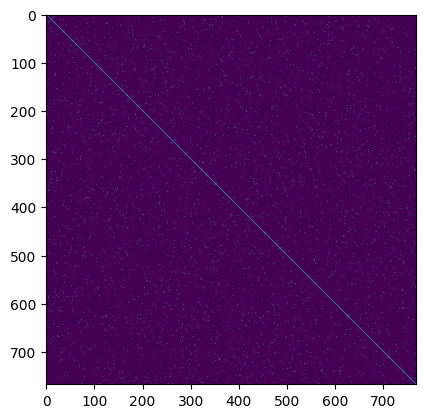

In [16]:
plt.imshow(md.kernals[0])

In [17]:
known_anchors = np.column_stack([dc0a.anchors[:, 0], dc0b.anchors[:150, 0], dc0a.anchors[:, 1]])
known_anchors[:4]

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 768 and the array at index 1 has size 150

In [9]:
#Ensure labels correspond to class
md.known_anchors = np.array([])
for anchors in known_anchors:
    if dc0a.labels[anchors[0]] == dc0b.labels[anchors[1]]:
        if len(md.known_anchors) < 1:
            md.known_anchors = anchors
        else:
            md.known_anchors = np.vstack([md.known_anchors, anchors])

md.known_anchors[-5:]

array([[ 75,  75,  75],
       [134, 134, 134],
       [109, 109, 109],
       [133, 133, 133],
       [ 63,  63,  63]])

In [10]:
dc0a.labels[[6, 57, 35]], dc0b.labels[[28,70,62]]

(array([1, 2, 1]), array([1, 2, 2]))

In [11]:
#Cache the lengths of the domains
md.len_domains = [len(domain) for domain in md.domains]
for length in md.len_domains:
    print(length)

150
150
150


In [12]:
md.known_anchors_adjusted = np.array(md.known_anchors)
for i, length in enumerate(md.len_domains):
    if i == len(md.domains) - 1:
        break
    else:
        md.known_anchors_adjusted += np.concatenate((np.repeat(0, i+1), np.repeat(length, len(md.domains)-(i+1))))
md.known_anchors_adjusted[:4], md.known_anchors[:4]

(array([[ 28, 178, 328],
        [  6, 156, 306],
        [ 70, 220, 370],
        [ 62, 212, 362]]),
 array([[28, 28, 28],
        [ 6,  6,  6],
        [70, 70, 70],
        [62, 62, 62]]))

In [13]:
anc = np.array(md.known_anchors, dtype = float)
anc[10][0] = np.nan
md.known_anchors = anc

In [14]:
~np.isnan(md.known_anchors[10][0]), type(md.known_anchors[10][0]), md.known_anchors[10][0], type(md.known_anchors[10][1]), md.known_anchors[10][1]

(False, numpy.float64, nan, numpy.float64, 8.0)

Time Data Below
 Time it took to execute the graph for domain 0:  0.22581
 Time it took to compute kernal 0:  0.00028
 Time it took to execute SGDM for domain 1:  0.00035
 Time it took to execute the graph for domain 1:  0.07538
 Time it took to execute the graph for domain 2:  0.08012
 Time it took to compute kernal 2:  9e-05
Length of weights to add: 32
Length of edges to add: 5
Length of edges to add: 5
Length of edges to add: 6
Length of edges to add: 6
Length of edges to add: 5
Length of edges to add: 5
Length of weights to add: 40
Length of edges to add: 6
Length of edges to add: 6
Length of edges to add: 8
Length of edges to add: 8
Length of edges to add: 6
Length of edges to add: 6
Length of weights to add: 40
Length of edges to add: 8
Length of edges to add: 8
Length of edges to add: 7
Length of edges to add: 7
Length of edges to add: 5
Length of edges to add: 5
Length of weights to add: 34
Length of edges to add: 5
Length of edges to add: 5
Length of edges to add: 6
Length of

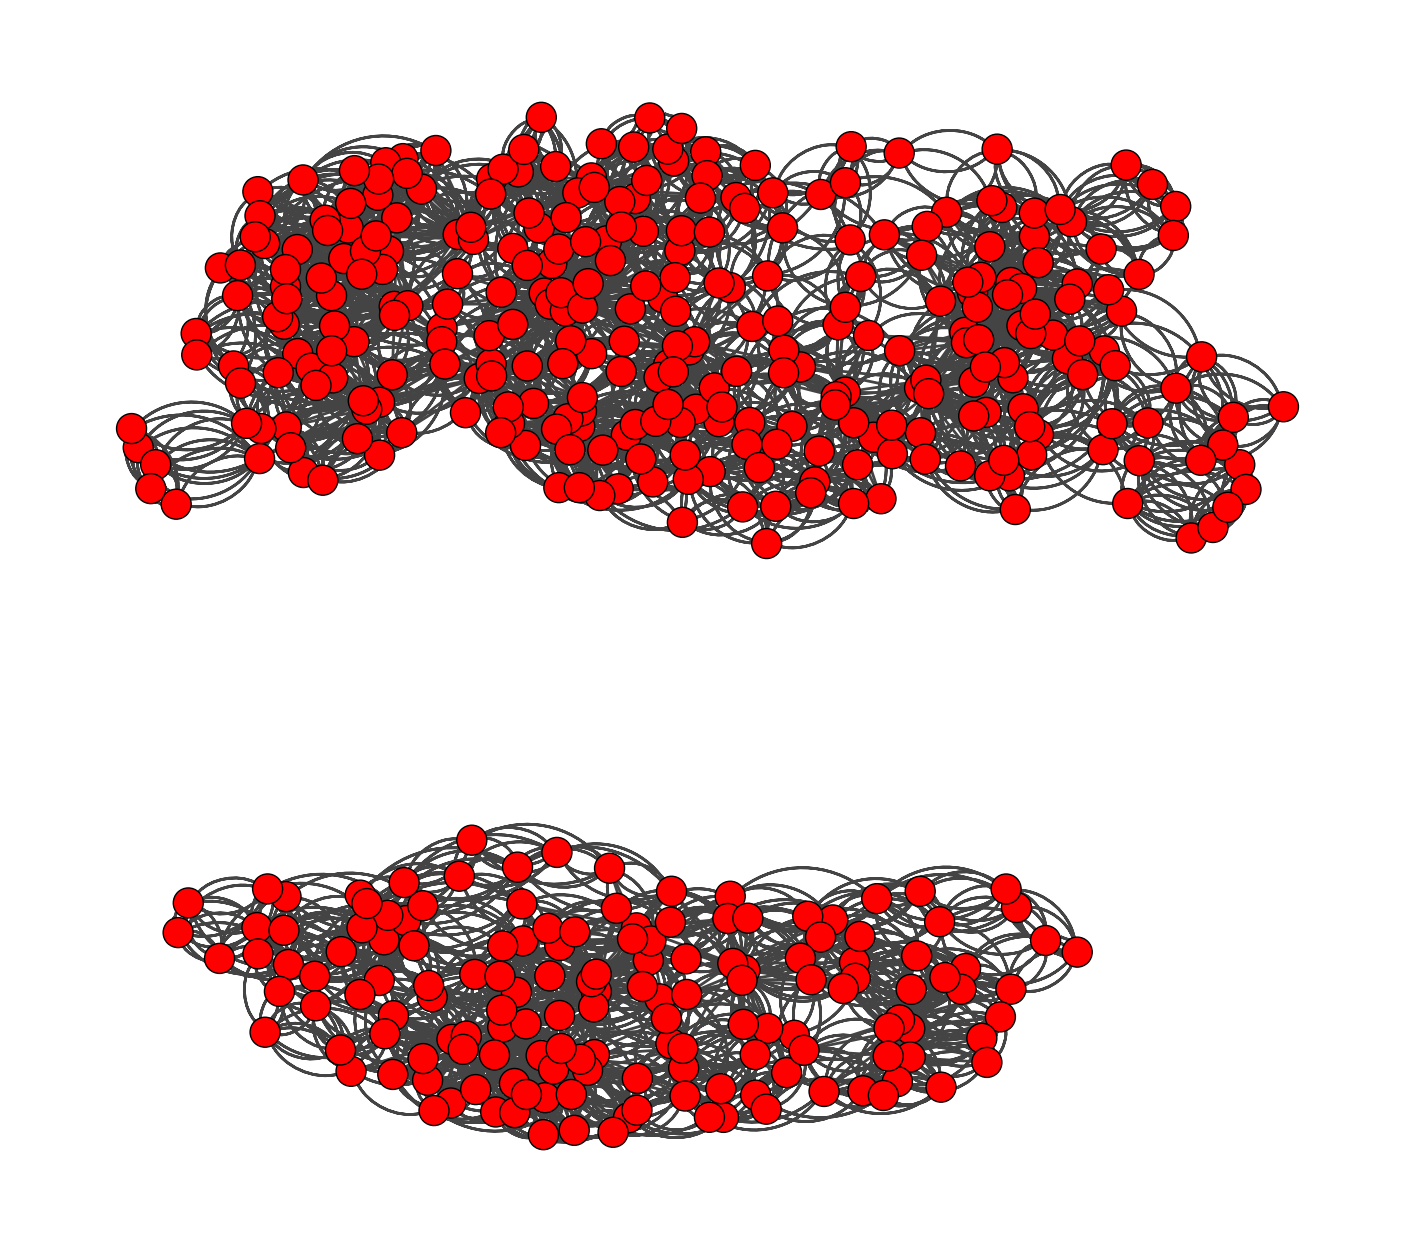

 Time it took to compute merge_graphs function:  6.97424
 Time it took to compute similarity_matrix function:  0.00109
Using optimal t value of 16
 Time it took to compute diffusion process:  0.08902
Fit process finished. We recommend calling optimize_by_creating_connections.


In [15]:
md.fit([dc0a.split_A, dc0b.split_B, dc0a.split_B], md.known_anchors[5:30]) 

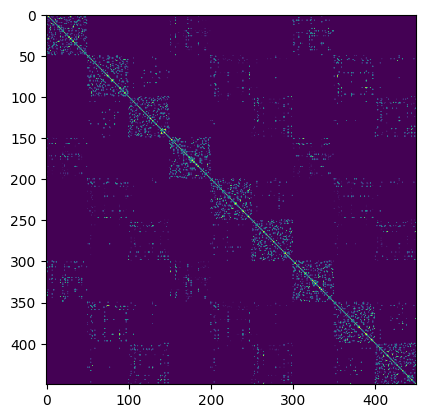

In [16]:
plt.imshow(md.graphAB)

(<matplotlib.image.AxesImage at 0x7fba3877c7c0>, 300, [150, 150, 150])

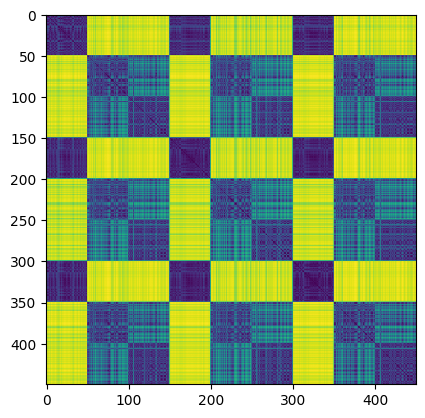

In [17]:
plt.imshow(md.int_diff_dist), sum(md.len_domains[:2]), md.len_domains

Scores from domain 1 to 2: 
    Cross Embedding: 0.9299999999999999


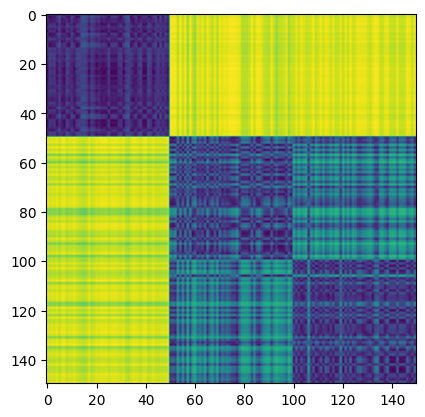

    FOSCTTM: 0.06671111111111112
Scores from domain 1 to 3: 
    Cross Embedding: 0.9199999999999999


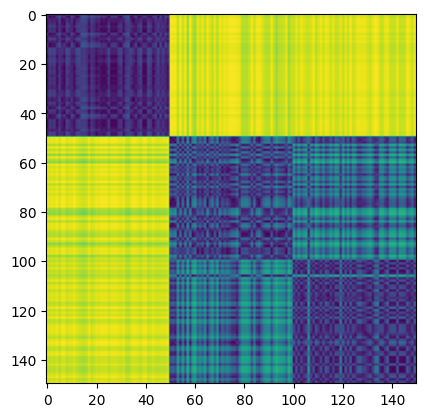

    FOSCTTM: 0.06786666666666666
Scores from domain 2 to 3: 
    Cross Embedding: 0.9533333333333334


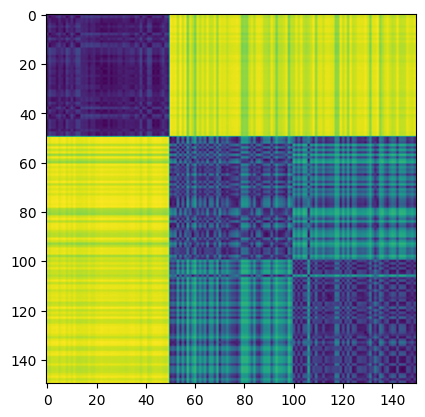

    FOSCTTM: 0.060844444444444444


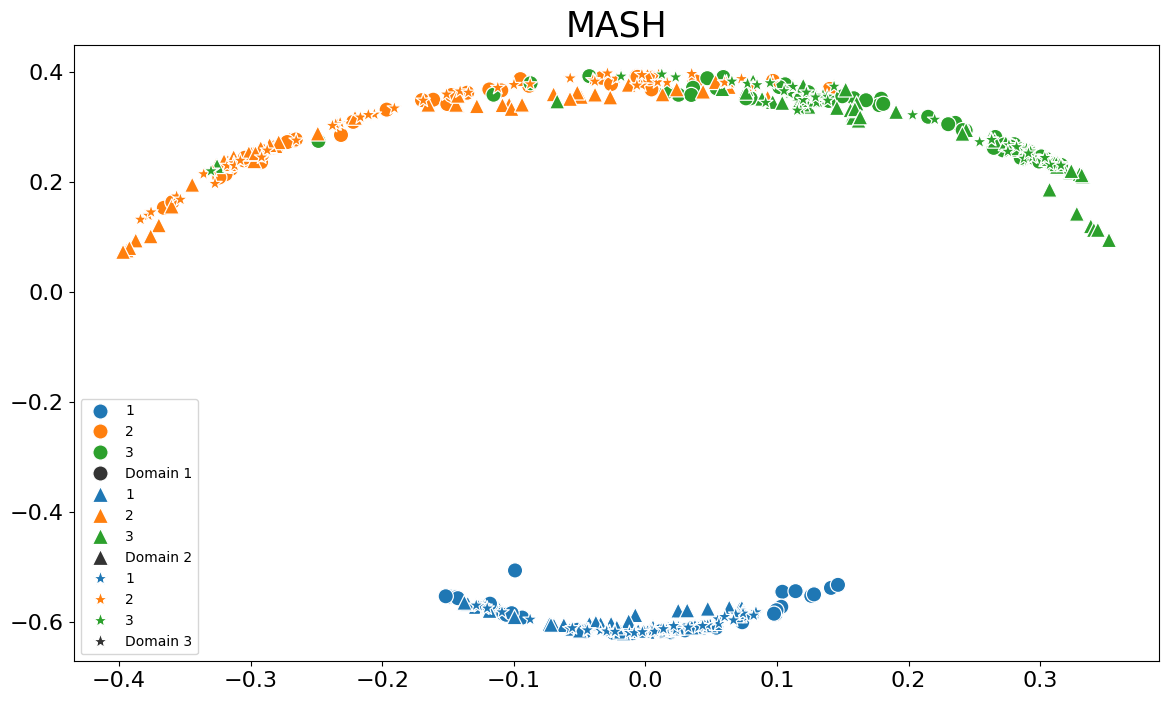

In [18]:
md.plot_emb([dc0a.labels, dc0b.labels, dc0a.labels], n_comp = 2)

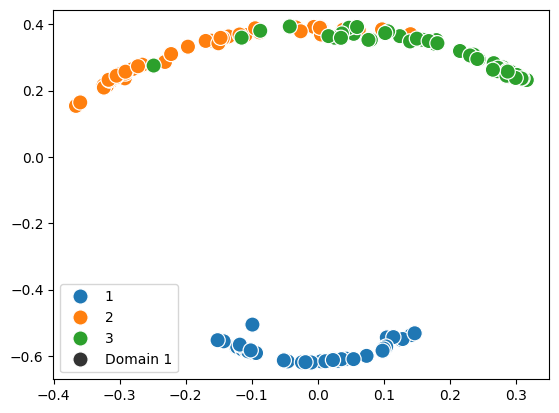

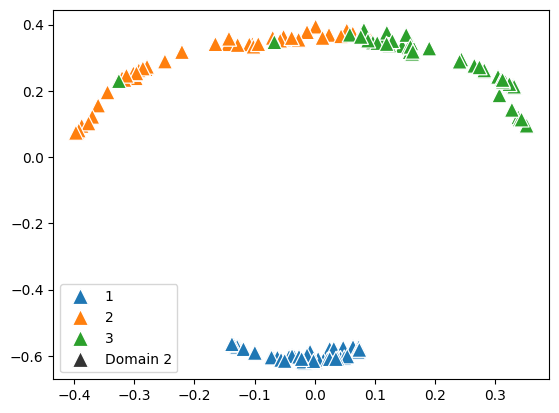

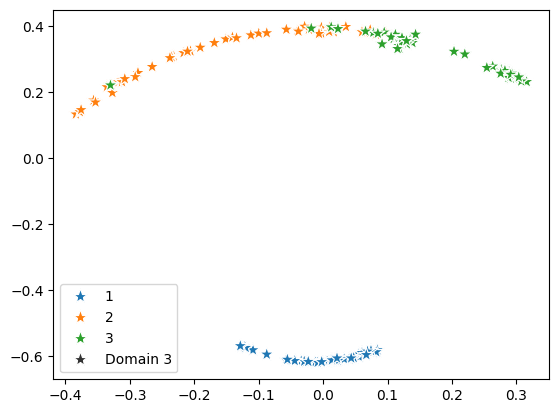

In [19]:
md.plot_all_embeddings([dc0a.labels, dc0b.labels, dc0a.labels])

<><><><><> Beggining Tests. Original Connections show below <><><><><>


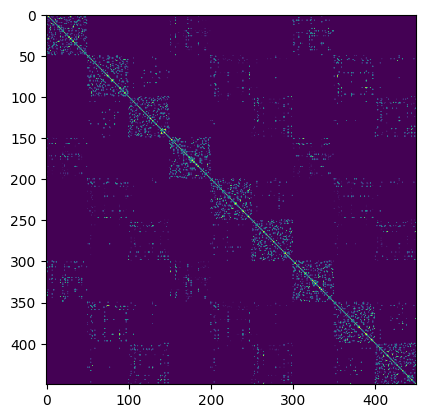

In [20]:
pruned = md.optimize_by_creating_connections(epochs = 3, hold_out_anchors= md.known_anchors[0:5])

In [21]:
pruned[0]

array([35.,  2.])

In [22]:
pruned.shape, pruned.min(), pruned.max(), pruned.argmax(), len(md.known_anchors) + 5

((3225, 2), 0.0, 449.0, 785, 30)

In [23]:
np.where(pruned[:, 0] == 59 )[0].shape, print(np.where(pruned[:, 0] == 59 )[0])

[  51   52   53   54   55   56  200  201  202  203  204  205  354  355
  356  357  358  359  360 1248 1249 1250 1251 1252 1253 1254 1255 2132
 2133 2134 2135 2136 2137]


((33,), None)

In [24]:
#Memory Contraints with doing the optimization:
print(f"""
Assume knn = 5, with three iris datasets, and so our diffusion operator is shaped (450, 450)
with a memory constraint of {450 *450} float32s. That's doable. 

Then, we have 30 anchors, each anchor having a match in the other domains. Each anchor has five neighbors
which will be know distances for each other domain. 

Ex. Anchor A connects to B and C. Since A has 5 connections, and B and C do as well, we will need 15 pruned 
connections for just A. Consequently, the same applies for B and C, for a total of 45 connections. We then 
multiply this by 30 (once for each anchor) {30 * 45}.

We then need to add all of the connections to anchors {30*3 + 30*45}


""")


Assume knn = 5, with three iris datasets, and so our diffusion operator is shaped (450, 450)
with a memory constraint of 202500 float32s. That's doable. 

Then, we have 30 anchors, each anchor having a match in the other domains. Each anchor has five neighbors
which will be know distances for each other domain. 

Ex. Anchor A connects to B and C. Since A has 5 connections, and B and C do as well, we will need 15 pruned 
connections for just A. Consequently, the same applies for B and C, for a total of 45 connections. We then 
multiply this by 30 (once for each anchor) 1350.

We then need to add all of the connections to anchors 1440





## Seperating Features to be seperate domains

In [25]:
#Create tma
dc1 = tma.test_manifold_algorithms("iris.csv", split = "distort")

In [26]:
#Set up data
domains1 = np.reshape([dc1.split_A[:, 0], dc1.split_A[:, 1], dc1.split_A[:, 2], dc1.split_A[:, 3]], newshape = (4,150, 1)) # Testing seperating features to be seperate domains
labels1 = [dc1.labels, dc1.labels, dc1.labels, dc1.labels]
known_anchors1 = np.hstack([dc1.anchors, dc1.anchors])

In [27]:
md2 = MASH(knn = 5, verbose = 3)
md2.fit(domains1, known_anchors1[:30])

Using optimal t value of 14
Fit process finished. We recommend calling optimize_by_creating_connections.


Scores from domain 1 to 2: 
    Cross Embedding: 0.58
    FOSCTTM: 0.3836888888888889
Scores from domain 1 to 3: 
    Cross Embedding: 0.6633333333333333
    FOSCTTM: 0.3416888888888889
Scores from domain 1 to 4: 
    Cross Embedding: 0.71
    FOSCTTM: 0.3252
Scores from domain 2 to 3: 
    Cross Embedding: 0.6
    FOSCTTM: 0.3676
Scores from domain 2 to 4: 
    Cross Embedding: 0.5633333333333332
    FOSCTTM: 0.3589333333333334
Scores from domain 3 to 4: 
    Cross Embedding: 0.7966666666666666
    FOSCTTM: 0.25657777777777774


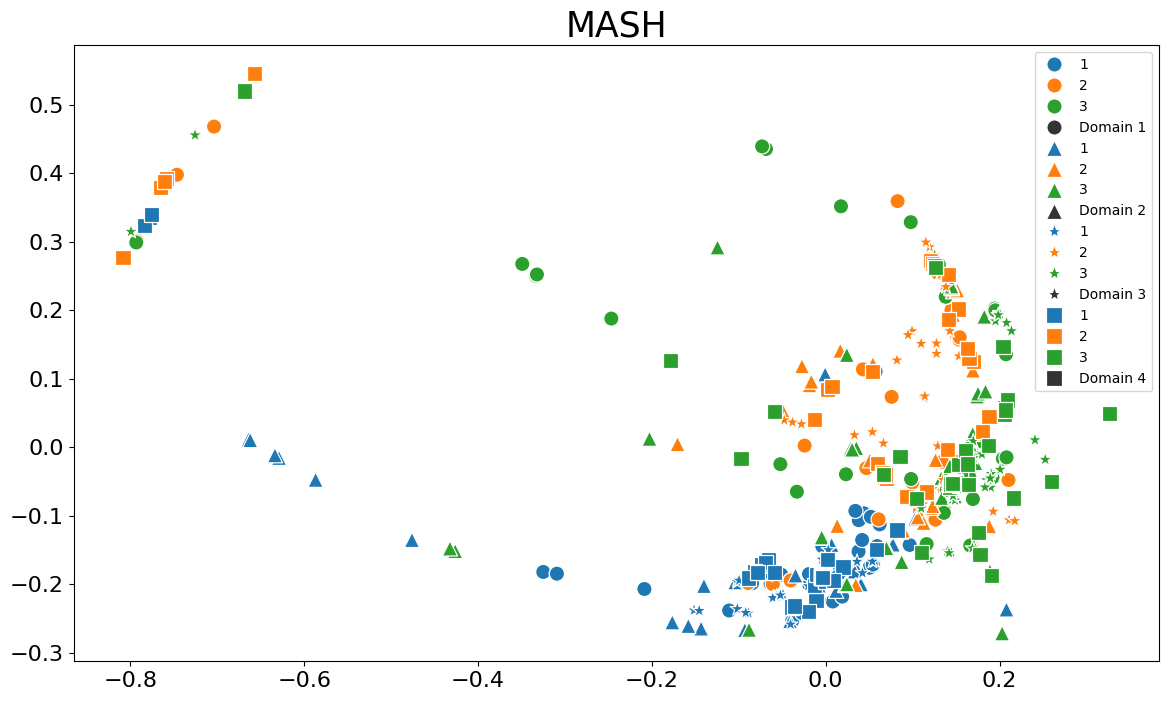

In [28]:
md2.plot_emb(labels1)

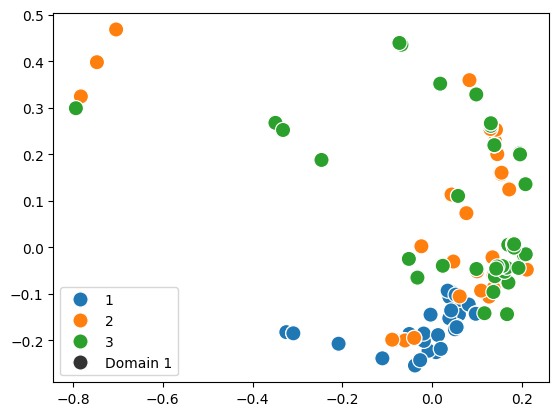

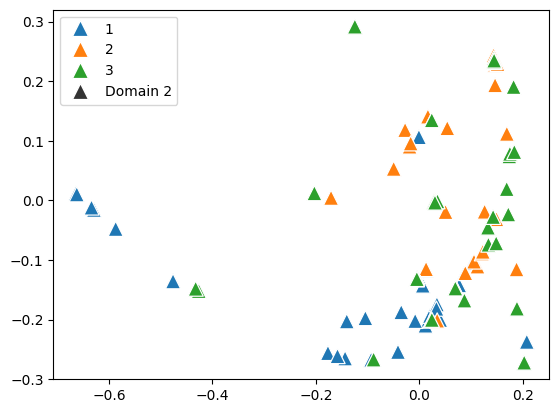

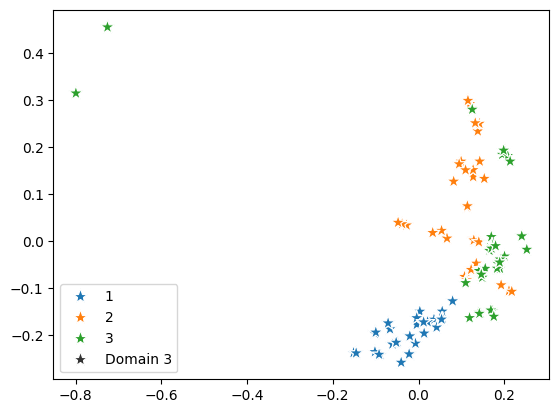

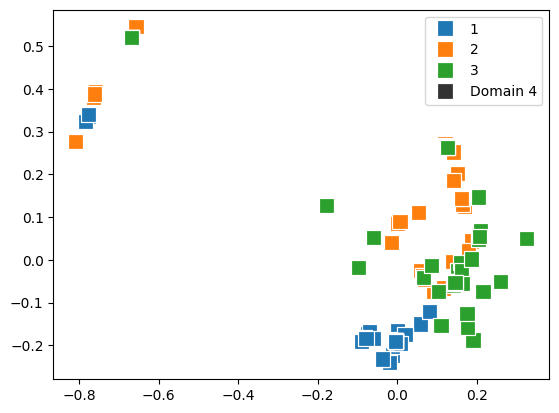

In [29]:
md2.plot_all_embeddings(labels1)

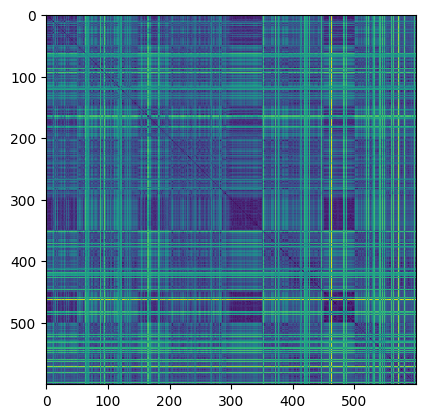

In [30]:
plt.imshow(md2.int_diff_dist)